In [3]:
!pip3 install tensorflow
!pip3 install kagglehub


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("borismarjanovic/price-volume-data-for-all-us-stocks-etfs")

In [12]:
file_path = os.path.join(path, "ETFs", "aadr.us.txt")
df = pd.read_csv(file_path)

# Extraer encabezados
header = df.columns.tolist()
print("Columnas:", header)
print("Filas:", len(df))


price = df["High"].to_numpy()             
raw_data = df.iloc[:, 1:].to_numpy()             

print("Ejemplo de price:", price[:5])
print("Dimensión de raw_data:", raw_data.shape)

Columnas: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
Filas: 1565
Ejemplo de price: [24.333 24.644 24.759 24.624 24.517]
Dimensión de raw_data: (1565, 6)


# Parsing Data



In [15]:
import numpy as np
price_high = df["High"].to_numpy()
price_low = df["Low"].to_numpy()
price = (price_high + price_low) / 2

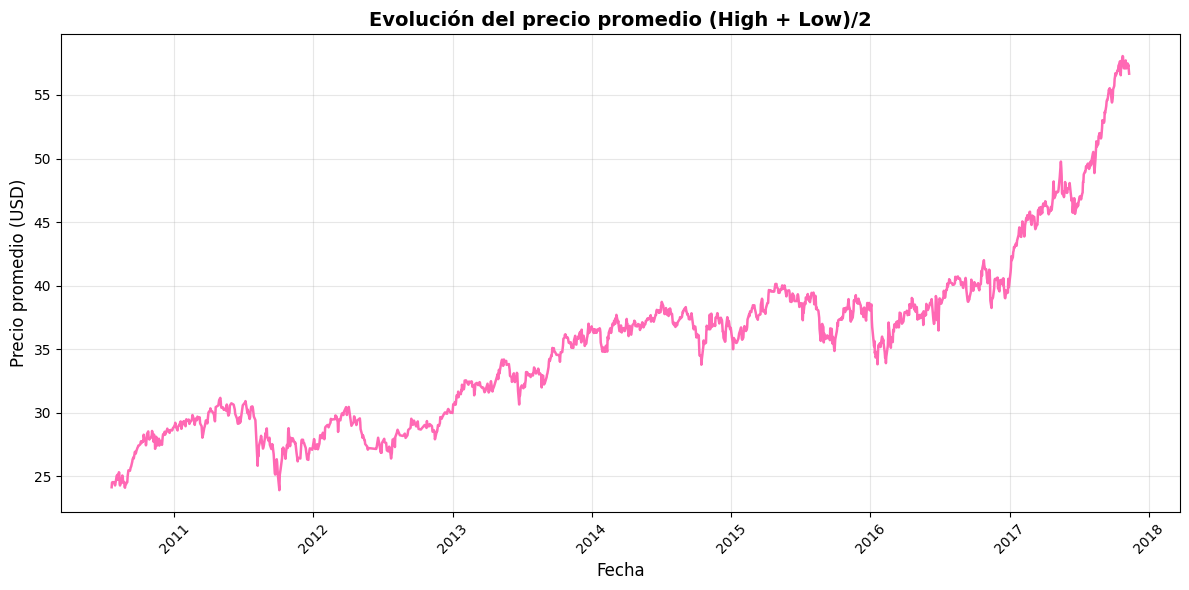

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convertir la columna 'Date' a formato de fecha
df["Date"] = pd.to_datetime(df["Date"])

plt.figure(figsize=(12,6))
plt.plot(df["Date"], price, color='hotpink', linewidth=1.8)

# Título y etiquetas
plt.title("Evolución del precio promedio (High + Low)/2", fontsize=14, weight='bold')
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio promedio (USD)", fontsize=12)

# Formato del eje X para fechas
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y")) 

# Rotar etiquetas y ajustar estilo
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
